## Telecom Churn Case study

In [ ]:
# import necessary librararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',300)

In [4]:
pd.set_option('display.max_rows',300)

In [5]:
# reading data file
telecom=pd.read_csv('telecom_churn_data.csv', encoding = 'latin')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
# checking dimensions
telecom.shape

(99999, 226)

In [7]:
# Creating column name list by types of columns
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols = [col for col in telecom.columns if col not in id_cols + date_cols + cat_cols]

In [8]:
#Checking to see if any columnns are missed
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == telecom.shape[1])

True


In [9]:
# percentage of missing values in each column
null_values=round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)
null_values.loc[null_values>0]

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

#### As there are lot of features having missing values, let us consider the features having more than 50% missing values

In [10]:
print("No. of features having more than 50% missing values: {} ".format(len(null_values.loc[null_values>50])))

No. of features having more than 50% missing values: 40 


In [11]:
null_values.loc[null_values>50]

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

#### Most of the features out of the 40 are required for the analysis. Hence, we will imput the missing values with 0

In [12]:
colname = ['av_rech_amt_data', 'arpu_2g', 'arpu_3g', 'count_rech_2g', 'count_rech_3g',
             'max_rech_data', 'total_rech_data','fb_user','night_pck_user']
imputeCols=list()

for i in colname:
    for j in['_6','_7','_8','_9']:
        imputeCols.append(i+j)

In [13]:
for col in imputeCols:
    telecom[col].fillna(0,inplace=True)

#### Let us now check the number of features having more than 50% missing values

In [14]:
null_values=round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)
null_values.loc[null_values>50]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
dtype: float64

#### As the above columns are not required for analysis, we can drop them

In [15]:
telecom=telecom.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'],axis='columns')

In [16]:
telecom.shape

(99999, 222)

In [17]:
null_values=round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)
missingcol=list(null_values.loc[null_values>5].index)

In [18]:
len(telecom[telecom[missingcol].isnull().all(axis=1)])

4392

In [19]:
telecom[telecom[missingcol].isnull().all(axis=1)][missingcol].head()

,std_ic_t2o_mou_9,std_og_t2m_mou_9,offnet_mou_9,std_og_t2c_mou_9,roam_ic_mou_9,std_ic_t2f_mou_9,std_og_t2f_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_og_t2t_mou_9,loc_og_t2m_mou_9,std_ic_t2m_mou_9,loc_og_mou_9,loc_og_t2f_mou_9,std_og_mou_9,loc_og_t2c_mou_9,isd_og_mou_9,spl_ic_mou_9,loc_ic_t2t_mou_9,spl_og_mou_9,og_others_9,loc_ic_t2f_mou_9,ic_others_9,isd_ic_mou_9,onnet_mou_9,loc_ic_t2m_mou_9,std_ic_mou_9,isd_og_mou_8,std_og_t2m_mou_8,loc_og_mou_8,std_og_t2t_mou_8,isd_ic_mou_8,std_ic_t2f_mou_8,ic_others_8,std_og_t2f_mou_8,og_others_8,std_og_t2c_mou_8,std_ic_mou_8,std_ic_t2o_mou_8,loc_og_t2c_mou_8,spl_og_mou_8,std_og_mou_8,std_ic_t2m_mou_8,spl_ic_mou_8,roam_ic_mou_8,onnet_mou_8,std_ic_t2t_mou_8,loc_ic_t2t_mou_8,loc_og_t2t_mou_8,loc_ic_mou_8,loc_og_t2m_mou_8,loc_ic_t2m_mou_8,offnet_mou_8,loc_og_t2f_mou_8,loc_ic_t2f_mou_8,roam_og_mou_8
35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### It is clear from above that these features are not having any value. We can impuote these columns with 0

In [20]:
for col in missingcol:
    telecom[col].fillna(0,inplace=True)

In [21]:
telecom.shape

(99999, 222)

In [22]:
null_values=round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)
missingcols=list(null_values.loc[null_values>2].index)

In [23]:
telecom=telecom[~telecom[missingcols].isnull().all(axis=1)]
telecom.shape

(99617, 222)

In [24]:
for col in missingcols:
    telecom[col].fillna(0,inplace=True)

In [25]:
null_values=round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)
null_values.loc[null_values>0]

date_of_last_rech_6     1.49
date_of_last_rech_7     1.47
last_date_of_month_9    1.30
last_date_of_month_8    0.75
loc_og_t2o_mou          0.64
std_og_t2o_mou          0.64
loc_ic_t2o_mou          0.64
last_date_of_month_7    0.32
dtype: float64

In [26]:

col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']
for c in col: 
    print("Unique values in column %s are %s" % (c,telecom[c].unique()))

Unique values in column loc_og_t2o_mou are [ 0. nan]
Unique values in column std_og_t2o_mou are [ 0. nan]
Unique values in column loc_ic_t2o_mou are [ 0. nan]
Unique values in column last_date_of_month_7 are ['7/31/2014' nan]
Unique values in column last_date_of_month_8 are ['8/31/2014' nan]
Unique values in column last_date_of_month_9 are ['9/30/2014' nan]
Unique values in column date_of_last_rech_7 are ['7/16/2014' '7/31/2014' '7/24/2014' '7/28/2014' '7/17/2014' '7/25/2014'
 '7/23/2014' '7/5/2014' '7/10/2014' '7/22/2014' '7/30/2014' '7/3/2014'
 '7/7/2014' '7/29/2014' '7/27/2014' '7/19/2014' '7/14/2014' '7/20/2014'
 '7/4/2014' '7/12/2014' nan '7/26/2014' '7/11/2014' '7/6/2014' '7/21/2014'
 '7/13/2014' '7/15/2014' '7/18/2014' '7/9/2014' '7/2/2014' '7/8/2014'
 '7/1/2014']
Unique values in column date_of_last_rech_8 are ['8/8/2014' '8/28/2014' '8/14/2014' '8/31/2014' '8/9/2014' '8/24/2014'
 '8/26/2014' '8/30/2014' '8/29/2014' '8/27/2014' '8/21/2014' '8/10/2014'
 '8/25/2014' '8/19/2014' '

In [27]:
col = ['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']
for c in col:
    print(telecom[c].value_counts())
    telecom[c].fillna(telecom[c].mode()[0], inplace=True)

0.0    98980
Name: loc_og_t2o_mou, dtype: int64
0.0    98980
Name: std_og_t2o_mou, dtype: int64
0.0    98980
Name: loc_ic_t2o_mou, dtype: int64
7/31/2014    99300
Name: last_date_of_month_7, dtype: int64
8/31/2014    98866
Name: last_date_of_month_8, dtype: int64
9/30/2014    98321
Name: last_date_of_month_9, dtype: int64


In [28]:
null_values=round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending=False)
null_values.loc[null_values>0]

date_of_last_rech_6    1.49
date_of_last_rech_7    1.47
dtype: float64

In [29]:
telecom[telecom['date_of_last_rech_6'].isnull()]['date_of_last_rech_6'] = '6/30/2014'
telecom[telecom['date_of_last_rech_7'].isnull()]['date_of_last_rech_7'] = '7/31/2014'
telecom[telecom['date_of_last_rech_8'].isnull()]['date_of_last_rech_8'] = '8/31/2014'
telecom[telecom['date_of_last_rech_9'].isnull()]['date_of_last_rech_9'] = '9/30/2014'

In [30]:
telecom=telecom.replace({'date_of_last_rech_8': {0: '8/31/2014'},'date_of_last_rech_9': {0: '9/30/2014'}}) 

#### Lets look for columns having all values 0

In [31]:
zero_columns=telecom.columns[(telecom == 0).all()]
zero_columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [32]:
#We can remove above columns as all the values are only zero
telecom.drop(zero_columns,axis=1,inplace=True)

In [33]:
# Percentage of data left after removing the missing values.
print("Percentage of data remaining after treating missing values: {}%".format(round(telecom.shape[0]/99999 *100,2)))
print ("Number of customers: {}".format(telecom.shape[0]))
print ("Number of features: {}".format(telecom.shape[1]))

Percentage of data remaining after treating missing values: 99.62%
Number of customers: 99617
Number of features: 211


##### Lets fix the datatypes

In [34]:
telecom.reset_index(inplace=True,drop=True)

In [35]:
date_cols = list(telecom.filter(regex='date').columns)

In [36]:
#Converting to Datetime
for col in date_cols:
    telecom[col] = pd.to_datetime(telecom[col], format='%m/%d/%Y')

##### There are some monthly features which are not in the standard naming format (_6,_7,_8,_9)

In [37]:
#Renaming the columns
telecom.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

### Creating New Feature

In [38]:
# Let us get the index of null values for both total recharge data and avg recharge and verify if both of them match. 
# if the result is false it means all rows of total_rech_data and av_rech_amt_data has null at same rows.
res = telecom.total_rech_data_6[telecom.total_rech_data_6.isna()].index != telecom.av_rech_amt_data_6[telecom.av_rech_amt_data_6.isna()].index
print('June :', res.any())
res = telecom.total_rech_data_7[telecom.total_rech_data_7.isna()].index != telecom.av_rech_amt_data_7[telecom.av_rech_amt_data_7.isna()].index
print('July :', res.any())
res =telecom.total_rech_data_8[telecom.total_rech_data_8.isna()].index != telecom.av_rech_amt_data_8[telecom.av_rech_amt_data_8.isna()].index
print('Aug :', res.any())

June : False
July : False
Aug : False


In [39]:
# let's add a new derived variable total recharge amount for data: total_rech_amt_data
telecom['total_data_rech_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['total_data_rech_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7

In [40]:
#Checking for null values
print(any(telecom.total_rech_amt_6.isna()))
print(any(telecom.total_rech_amt_7.isna()))

False
False


In [41]:
# Calculating Total recharge amt for June and July(First 2 months)

# Total recharge amount for June and July 
telecom['amt_data_6'] = telecom.total_rech_amt_6 + telecom.total_data_rech_6
telecom['amt_data_7'] = telecom.total_rech_amt_7 + telecom.total_data_rech_7

In [42]:
# average recharge done by customer in June and July
telecom['av_amt_data_6_7'] = (telecom.amt_data_6 + telecom.amt_data_7)/2

In [43]:
telecom[['av_amt_data_6_7', 'total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7']].head()

,av_amt_data_6_7,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7
0,559.0,252.0,252.0,614.0,504.0
1,306.0,0.0,154.0,74.0,538.0
2,241.5,0.0,0.0,168.0,315.0
3,270.0,0.0,0.0,230.0,310.0
4,301.0,56.0,0.0,252.0,350.0


### Filter high-value customers

#### Defining high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [44]:
# 70th percentile recharge amount
print("70th percentile Recharge amount: {0}".format(telecom.av_amt_data_6_7.quantile(0.7)))

70th percentile Recharge amount: 479.5


In [45]:
# Creating a seperate df for the High value customers whose total average recharge amount for good phase > 70th percentile
high_val_df = telecom.loc[telecom.av_amt_data_6_7 > telecom.av_amt_data_6_7.quantile(0.7), :]
high_val_df = high_val_df.reset_index(drop=True)
high_val_df.shape

(29882, 216)

In [46]:
#Deleting the variables created to filter high-value customers
high_val_df = high_val_df.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
high_val_df.shape

(29882, 211)

In [47]:
high_val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29882 entries, 0 to 29881
Columns: 211 entries, mobile_number to vbc_3g_9
dtypes: datetime64[ns](8), float64(168), int64(35)
memory usage: 48.1 MB


### Churn Derivation

#### Those customers who have not used either calls or internet in  September are "churned" customers

#### Target Variables to be used are as follows:
#### 1.total_ic_mou_9
#### 2.total_og_mou_9
#### 3.vol_2g_mb_9
#### 4.vol_3g_mb_9

In [48]:
#total incoming and outgoing minutes of usage
high_val_df['total_calls_mou_9'] = high_val_df.total_ic_mou_9 + high_val_df.total_og_mou_9

#2g and 3g data consumption
high_val_df['total_internet_mb_9'] =  high_val_df.vol_2g_mb_9 + high_val_df.vol_3g_mb_9

In [49]:
# Let's denote 0 as not churn and  1 as churn
high_val_df['churn'] = high_val_df.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [50]:
high_val_df[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

,churn,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,1,0.00,0.00,0.00,0.00
1,1,0.00,0.00,0.00,0.00
2,0,34.91,142.18,0.00,0.00
3,0,252.61,1031.53,0.00,0.00
4,0,127.48,127.63,13.93,314.74
...,...,...,...,...,...
29877,0,391.63,64.21,0.00,0.00
29878,0,149.26,14.44,723.41,232.56
29879,0,547.11,1095.24,9.14,941.48
29880,0,265.84,182.16,0.05,393.34


In [51]:
# find the columns which has name ends with _9 attribute
mon_9_cols = high_val_df.columns[high_val_df.columns.str.endswith(pat = '_9')]
print("The columns names ends with _9 are given below...")
mon_9_cols

The columns names ends with _9 are given below...


Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'total_rech_data_9',
       'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9',
       'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9',
       'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9',
       'monthly_3g_9', 'sachet_3g_9', '

In [52]:
#Dropping derived columns
high_val_df = high_val_df.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [53]:
# changing churn data type to category
high_val_df.churn = high_val_df.churn.astype("category")

In [54]:
# Retrieve Churn Ratio
print("No. of users tagged as churners out of {} High-Value Customers: {}".format(high_val_df.shape[0],len(high_val_df[high_val_df.churn == 1])))
print("High-value customers Churn Percentage : {}%".format(round(len(high_val_df[high_val_df.churn == 1])/high_val_df.shape[0] *100,2)))

No. of users tagged as churners out of 29882 High-Value Customers: 2415
High-value customers Churn Percentage : 8.08%


#### There are just 8.08% churn cases.
#### This indicated an highly imbalanced data set where the churn cases are the minority(8.08%) as opposed to the non-churners who are the majority(91.91)

## Calculate difference between 8th and the average of the previous months(6th and 7th month)
Let's derive some variables. The difference can be in patterns such as usage difference or recharge value difference. Let's calculate difference variable as the difference between 8th month and the average of 6th and 7th month. These are few of the most important features

In [55]:
high_val_df['arpu_diff'] = high_val_df.arpu_8 - ((high_val_df.arpu_6 + high_val_df.arpu_7)/2)
high_val_df['onnet_mou_diff'] = high_val_df.onnet_mou_8 - ((high_val_df.onnet_mou_6 + high_val_df.onnet_mou_7)/2)
high_val_df['offnet_mou_diff'] = high_val_df.offnet_mou_8 - ((high_val_df.offnet_mou_6 + high_val_df.offnet_mou_7)/2)
high_val_df['roam_ic_mou_diff'] = high_val_df.roam_ic_mou_8 - ((high_val_df.roam_ic_mou_6 + high_val_df.roam_ic_mou_7)/2)
high_val_df['roam_og_mou_diff'] = high_val_df.roam_og_mou_8 - ((high_val_df.roam_og_mou_6 + high_val_df.roam_og_mou_7)/2)
high_val_df['loc_og_mou_diff'] = high_val_df.loc_og_mou_8 - ((high_val_df.loc_og_mou_6 + high_val_df.loc_og_mou_7)/2)
high_val_df['std_og_mou_diff'] = high_val_df.std_og_mou_8 - ((high_val_df.std_og_mou_6 + high_val_df.std_og_mou_7)/2)
high_val_df['isd_og_mou_diff'] = high_val_df.isd_og_mou_8 - ((high_val_df.isd_og_mou_6 + high_val_df.isd_og_mou_7)/2)
high_val_df['spl_og_mou_diff'] = high_val_df.spl_og_mou_8 - ((high_val_df.spl_og_mou_6 + high_val_df.spl_og_mou_7)/2)
high_val_df['total_og_mou_diff'] = high_val_df.total_og_mou_8 - ((high_val_df.total_og_mou_6 + high_val_df.total_og_mou_7)/2)
high_val_df['loc_ic_mou_diff'] = high_val_df.loc_ic_mou_8 - ((high_val_df.loc_ic_mou_6 + high_val_df.loc_ic_mou_7)/2)
high_val_df['std_ic_mou_diff'] = high_val_df.std_ic_mou_8 - ((high_val_df.std_ic_mou_6 + high_val_df.std_ic_mou_7)/2)
high_val_df['isd_ic_mou_diff'] = high_val_df.isd_ic_mou_8 - ((high_val_df.isd_ic_mou_6 + high_val_df.isd_ic_mou_7)/2)
high_val_df['spl_ic_mou_diff'] = high_val_df.spl_ic_mou_8 - ((high_val_df.spl_ic_mou_6 + high_val_df.spl_ic_mou_7)/2)
high_val_df['total_ic_mou_diff'] = high_val_df.total_ic_mou_8 - ((high_val_df.total_ic_mou_6 + high_val_df.total_ic_mou_7)/2)
high_val_df['total_rech_num_diff'] = high_val_df.total_rech_num_8 - ((high_val_df.total_rech_num_6 + high_val_df.total_rech_num_7)/2)
high_val_df['total_rech_amt_diff'] = high_val_df.total_rech_amt_8 - ((high_val_df.total_rech_amt_6 + high_val_df.total_rech_amt_7)/2)
high_val_df['max_rech_amt_diff'] = high_val_df.max_rech_amt_8 - ((high_val_df.max_rech_amt_6 + high_val_df.max_rech_amt_7)/2)
high_val_df['total_rech_data_diff'] = high_val_df.total_rech_data_8 - ((high_val_df.total_rech_data_6 + high_val_df.total_rech_data_7)/2)
high_val_df['max_rech_data_diff'] = high_val_df.max_rech_data_8 - ((high_val_df.max_rech_data_6 + high_val_df.max_rech_data_7)/2)
high_val_df['av_rech_amt_data_diff'] = high_val_df.av_rech_amt_data_8 - ((high_val_df.av_rech_amt_data_6 + high_val_df.av_rech_amt_data_7)/2)
high_val_df['vol_2g_mb_diff'] = high_val_df.vol_2g_mb_8 - ((high_val_df.vol_2g_mb_6 + high_val_df.vol_2g_mb_7)/2)
high_val_df['vol_3g_mb_diff'] = high_val_df.vol_3g_mb_8 - ((high_val_df.vol_3g_mb_6 + high_val_df.vol_3g_mb_7)/2)

In [56]:
high_val_df['total_og_mou_diff'].describe()

count    29882.000000
mean       -67.793232
std        502.706654
min      -7213.410000
25%       -168.217500
50%        -14.720000
75%         67.892500
max      12768.705000
Name: total_og_mou_diff, dtype: float64

In [57]:
#All column names ending with 9(churned month cols)
mon_9_cols = high_val_df.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in mon_9_cols]
cat_cols.append('churn')
num_cols = [col for col in high_val_df.columns if col not in cat_cols]

In [58]:
#Fix column data types
high_val_df[num_cols] = high_val_df[num_cols].apply(pd.to_numeric)
high_val_df[cat_cols] = high_val_df[cat_cols].apply(lambda column: column.astype("category"), axis=0)

## Exploratory Data Analysis

In [59]:
#  plotting functions
def dtype(var):
    if var.dtype == np.int64 or var.dtype == np.float64:
        return 'numerical'
    elif var.dtype == 'category':
        return 'categorical'
    
def uni(var, stats=True):
    
    if dtype(var) == 'numerical':
        sns.distplot(var)
        if stats == True:
            print(var.describe())
    
    elif dtype(var) == 'categorical':
        sns.countplot(var)
        if stats == True:
            print(var.value_counts())
        
def bivar(var1, var2):
    if dtype(var1) == 'numerical' and dtype(var2) == 'numerical':
        sns.regplot(var1, var2)
    elif (dtype(var1) == 'categorical' and dtype(var2) == 'numerical') or (dtype(var1) == 'numerical' and dtype(var2) == 'categorical'):        
        sns.boxplot(var1, var2)

### Univariate Analysis

count    29882.000000
mean       559.029993
std        460.480309
min      -2258.709000
25%        310.714250
50%        482.863500
75%        700.573750
max      27731.088000
Name: arpu_6, dtype: float64


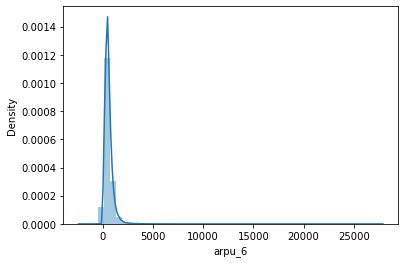

In [62]:
uni(high_val_df.arpu_6)
plt.show()

count    29882.000000
mean       234.436041
std        458.983577
min          0.000000
25%         10.490000
50%         65.710000
75%        240.387500
max      10752.560000
Name: onnet_mou_8, dtype: float64


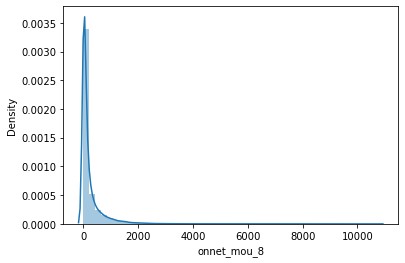

In [63]:
uni(high_val_df.onnet_mou_8)
plt.show()

count    29882.000000
mean       303.453829
std        447.533916
min          0.000000
25%         31.810000
50%        156.080000
75%        397.405000
max      10310.760000
Name: offnet_mou_9, dtype: float64


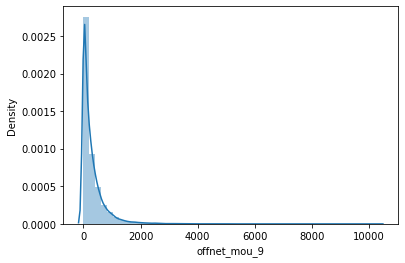

In [64]:
uni(high_val_df.offnet_mou_9)
plt.show()

#### From the above Visuals, it is evident that the features are skewed to the left

### BiVariate Analysis

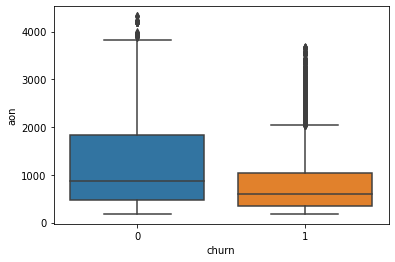

In [65]:
bivar(high_val_df.churn, high_val_df.aon)
plt.show()

In [66]:
plt.yticks(high_val_df.churn)
bivar(high_val_df.churn, high_val_df.spl_og_mou_8)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000019AFD6000D0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
bivar(high_val_df.churn, high_val_df.spl_ic_mou_diff)
plt.show()

In [ ]:
bivar(high_val_df.churn, high_val_df.total_ic_mou_diff)
plt.show()

In [67]:
pd.crosstab(high_val_df.churn, high_val_df.night_pck_user_8, normalize='columns')*100

night_pck_user_8,0.0,1.0
churn,,
0,91.855387,97.360704
1,8.144613,2.639296


In [68]:
pd.crosstab(high_val_df.churn, high_val_df.sachet_3g_8)

sachet_3g_8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,27,29,30,38,41
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24888,1605,397,182,105,86,43,35,28,19,15,8,11,10,6,6,2,2,3,1,3,3,2,1,1,1,2,1,1
1,2344,47,5,8,4,2,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


#### Cap outliers in all numeric variables with k-sigma technique

In [69]:
def ksigma(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [70]:
# cap outliers in the numeric columns
high_val_df[num_cols] = high_val_df[num_cols].apply(ksigma, axis=0)

In [71]:
high_val_df.shape

(29882, 235)

## Modelling

In [73]:
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC

In [74]:
# creating copy of the final high_val_df dataframe
high_val_df_PCA = high_val_df.copy()
# removing the columns not required for modeling
high_val_df_PCA.drop(['mobile_number', 'aon'], axis=1, inplace=True)

In [75]:
dateTimeCols = list(high_val_df_PCA.select_dtypes(include=['datetime64']).columns)
high_val_df_PCA.drop(dateTimeCols, axis=1, inplace=True)

In [76]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = high_val_df_PCA.drop(['churn'], axis=1)

#putting response variables in Y
y = high_val_df_PCA['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [77]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [78]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

#### Handling class imbalance: Using SMOTE 

##### This technique is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset.

In [79]:
print("Counts of label '1',before OverSampling: {}".format(sum(y_train==1)))
print("Counts of label '0',before OverSampling: {} \n".format(sum(y_train==0)))
print("Churn event rate, Before OverSampling : {}% \n".format(round(sum(y_train==1)/len(y_train)*100,2)))

Counts of label '1',before OverSampling: 1721
Counts of label '0',before OverSampling: 19196 

Churn event rate, Before OverSampling : 8.23% 



In [80]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, sampling_strategy = 1)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [81]:
print('Shape of train_X after OverSampling: {}'.format(X_train_res.shape))
print('Shape of train_y after OverSampling: {} \n'.format(y_train_res.shape))

print("Counts of label '1',after OverSampling: {}".format(sum(y_train_res==1)))
print("Counts of label '0',after OverSampling: {}".format(sum(y_train_res==0)))
print("Churn event rate,after OverSampling: {}% \n".format(round(sum(y_train_res==1)/len(y_train_res)*100,2)))

Shape of train_X after OverSampling: (38392, 232)
Shape of train_y after OverSampling: (38392,) 

Counts of label '1',after OverSampling: 19196
Counts of label '0',after OverSampling: 19196
Churn event rate,after OverSampling: 50.0% 



In [82]:
#Importing PCA
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [83]:
#Implementing PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

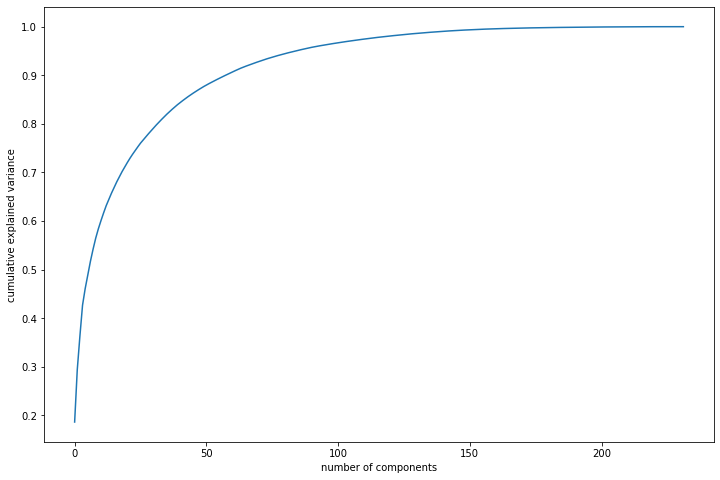

In [84]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### About 50 components are enough to describe 95% of the variance in the dataset

In [85]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=35)

In [86]:
X_train_pca = pca_final.fit_transform(X_train_res)
X_train_pca.shape

(38392, 35)

In [87]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0171627475789014 , min corr:  -0.01578379235611612


##### Clearly, there is not co-relation between any two variables

In [88]:
#Applying selected components to the test data - 50 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8965, 35)

### Creating methods for modelling

In [89]:
def roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

In [90]:
def ModelMetrics(actual_churn=False,pred_churn=False):
    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    # Sensitivity
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # FPR - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [91]:
def predictChurnUsingProb(model,X,y,prob):

    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    ModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [92]:
def findOptimalCutoff(df):

    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)

    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)

    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

In [93]:
def fitmodel(alg, X_train, y_train, performCV=True, cv_folds=5):

    alg.fit(X_train, y_train)
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]

    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')

    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

### 1. Logistic Regression

In [94]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr0 = LogisticRegression(class_weight='balanced')

In [95]:
fitmodel(lr0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.9724
Recall/Sensitivity : 0.993
AUC Score (Train): 0.992609
CV Score : Mean - 0.9923214 | Std - 0.0009821641 | Min - 0.9904972 | Max - 0.9933133


In [96]:
pred_probs_test = lr0.predict(X_test_pca)
ModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.9641203231874711
Sensitivity/Recall : 0.9740634005763689
Specificity: 0.9541772457985733
False Positive Rate: 0.045822754201426674
Positive predictive value: 0.6407582938388625
Negative Predictive value: 0.997724399494311
sklearn precision score value: 0.6407582938388625


In [97]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test,pred_probs_test)))

Accuracy : 0.9557166759620748
Recall : 0.9740634005763689
Precision : 0.6407582938388625


In [98]:
#Making prediction on the test data
pred_probs_train = lr0.predict_proba(X_train_pca)[:,1]
print("roc_auc_score(Train) {:2.2}".format(metrics.roc_auc_score(y_train_res, pred_probs_train)))

roc_auc_score(Train) 0.99


In [99]:
cut_off_prob=0.5
y_train_df = predictChurnUsingProb(lr0,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9724421754532194
Sensitivity/Recall : 0.9929672848510106
Specificity: 0.9519170660554283
False Positive Rate: 0.04808293394457178
Positive predictive value: 0.9538130504403523
Negative Predictive value: 0.9926662320730117
sklearn precision score value: 0.9538130504403523


,churn,churn_Prob,final_predicted
0,0,4.595882e-03,0
1,0,3.504312e-10,0
2,0,3.222585e-13,0
3,0,6.470353e-11,0
4,0,1.683483e-11,0


### Plotting the ROC Curve

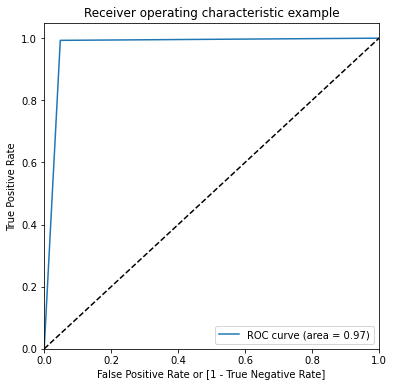

(array([0.        , 0.04808293, 1.        ]),
 array([0.        , 0.99296728, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [100]:
roc(y_train_df.churn, y_train_df.final_predicted)

#### The roc curve is lying in the top left corner which is a sign of a good fit.

In [101]:
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.97


     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.960825  0.997395  0.924255
0.2   0.2  0.965514  0.996093  0.934934
0.3   0.3  0.968275  0.995520  0.941029
0.4   0.4  0.970332  0.994218  0.946447
0.5   0.5  0.972442  0.992967  0.951917
0.6   0.6  0.974422  0.991144  0.957700
0.7   0.7  0.974969  0.985987  0.963951
0.8   0.8  0.973406  0.974891  0.971921
0.9   0.9  0.948557  0.915139  0.981975


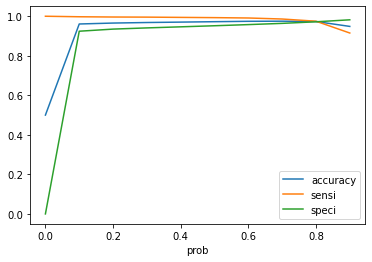

In [102]:
#Finding Optimal cutoff point
findOptimalCutoff(y_train_df)

#### From the curve above, 0.75 is the optimum point .

In [103]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.75
predictChurnUsingProb(lr0,X_train_pca,y_train_res,cut_off_prob)

Roc_auc_score : 0.9749166493019379
Sensitivity/Recall : 0.9823921650343822
Specificity: 0.9674411335694937
False Positive Rate: 0.03255886643050636
Positive predictive value: 0.9679207514243187
Negative Predictive value: 0.9821249140620868
sklearn precision score value: 0.9679207514243187


,churn,churn_Prob,final_predicted
0,0,4.595882e-03,0
1,0,3.504312e-10,0
2,0,3.222585e-13,0
3,0,6.470353e-11,0
4,0,1.683483e-11,0
...,...,...,...
38387,1,9.608077e-01,1
38388,1,9.820703e-01,1
38389,1,9.965850e-01,1
38390,1,9.699783e-01,1


In [104]:
#Making prediction on test
predictChurnUsingProb(lr0,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.9573280762582503
Sensitivity/Recall : 0.9452449567723343
Specificity: 0.9694111957441663
False Positive Rate: 0.030588804255833636
Positive predictive value: 0.7216721672167217
Negative Predictive value: 0.9952830188679245
sklearn precision score value: 0.7216721672167217


,churn,churn_Prob,final_predicted
7717,0,8.584169e-12,0
2539,0,1.430589e-09,0
5585,0,9.999618e-06,0
16306,0,1.590640e-15,0
14491,0,7.191989e-01,0
...,...,...,...
21577,0,7.186869e-09,0
6262,0,1.472132e-02,0
1424,0,1.470404e-07,0
18297,0,2.700711e-16,0



- **sensitivity(Train)  :** 98.23%, **roc auc score(Train)  :** 97.49%
- **sensitivity(Test)   :** 94.52%, **roc auc score(Test)  :** 95.73%

### 2. Decision Tree

In [105]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
fitmodel(dt0, X_train_pca, y_train_res)


Model Report
Accuracy : 0.8987
Recall/Sensitivity : 0.9455
AUC Score (Train): 0.944321
CV Score : Mean - 0.9401618 | Std - 0.004643398 | Min - 0.9314406 | Max - 0.9445028


In [106]:
# make predictions
pred_probs_test = dt0.predict(X_test_pca)
#Let's check the model metrices.
ModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.8768437480074299
Sensitivity/Recall : 0.899135446685879
Specificity: 0.8545520493289808
False Positive Rate: 0.14544795067101923
Positive predictive value: 0.3415435139573071
Negative Predictive value: 0.9901933314653965
sklearn precision score value: 0.3415435139573071


In [107]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [108]:
grid_search.fit(X_train_pca, y_train_res)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   24.8s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:  1.8min finished


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'max_features': [8, 10, 15],
                         'min_samples_leaf': range(100, 400, 50),
                         'min_samples_split': range(100, 400, 100)},
             scoring='f1_weighted', verbose=1)

In [109]:
#printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.9090457379047742 using {'max_depth': 11, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 100}


In [110]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [111]:
fitmodel(dt_final,X_train_pca,y_train_res)


Model Report
Accuracy : 0.9214
Recall/Sensitivity : 0.9508
AUC Score (Train): 0.967397
CV Score : Mean - 0.9609429 | Std - 0.003126294 | Min - 0.9566138 | Max - 0.9660107


In [112]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
ModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.8806761898888411
Sensitivity/Recall : 0.8746397694524496
Specificity: 0.8867126103252327
False Positive Rate: 0.11328738967476726
Positive predictive value: 0.39313471502590674
Negative Predictive value: 0.9882765125993801
sklearn precision score value: 0.39313471502590674


In [113]:
# classification report
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

           0       0.99      0.89      0.93      8271
           1       0.39      0.87      0.54       694

    accuracy                           0.89      8965
   macro avg       0.69      0.88      0.74      8965
weighted avg       0.94      0.89      0.90      8965



After using hyperparameter tuning for the Decision Tree. The recall rate is 88.9% which is  significant to predict the churn.

For a better prediction, let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [114]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnUsingProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.921363825797041
Sensitivity/Recall : 0.9508230881433632
Specificity: 0.8919045634507189
False Positive Rate: 0.1080954365492811
Positive predictive value: 0.897919023958282
Negative Predictive value: 0.947744256850263
sklearn precision score value: 0.897919023958282


,churn,churn_Prob,final_predicted
0,0,0.148387,0
1,0,0.000000,0
2,0,0.000000,0
3,0,0.000000,0
4,0,0.000000,0


     prob  accuracy     sensi     speci
0.0   0.0  0.801808  1.000000  0.603615
0.1   0.1  0.881147  0.995364  0.766931
0.2   0.2  0.906126  0.984997  0.827256
0.3   0.3  0.914461  0.977547  0.851375
0.4   0.4  0.918316  0.968170  0.868462
0.5   0.5  0.921364  0.950823  0.891905
0.6   0.6  0.920114  0.937539  0.902688
0.7   0.7  0.902714  0.867941  0.937487
0.8   0.8  0.891852  0.835903  0.947802
0.9   0.9  0.847807  0.732548  0.963065


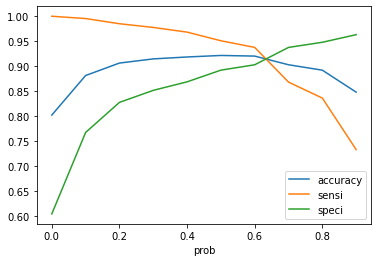

In [115]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

##### From the curve above, let'choose 0.6 as the optimum point.

In [118]:
# predicting churn with cut-off 0.6
cut_off_prob=0.6
y_train_df = predictChurnUsingProb(dt_final,X_train_pca,y_train_res,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9201135653261096
Sensitivity/Recall : 0.9375390706397166
Specificity: 0.9026880600125026
False Positive Rate: 0.09731193998749739
Positive predictive value: 0.9059652655424113
Negative Predictive value: 0.9352836400928375
sklearn precision score value: 0.9059652655424113


,churn,churn_Prob,final_predicted
0,0,0.148387,0
1,0,0.000000,0
2,0,0.000000,0
3,0,0.000000,0
4,0,0.000000,0


In [119]:
#Lets see how it performs on test data.
y_test_df= predictChurnUsingProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8757281700549505
Sensitivity/Recall : 0.8544668587896254
Specificity: 0.8969894813202757
False Positive Rate: 0.10301051867972434
Positive predictive value: 0.41038062283737026
Negative Predictive value: 0.9865691489361702
sklearn precision score value: 0.41038062283737026


,churn,churn_Prob,final_predicted
7717,0,0.140000,0
2539,0,0.002609,0
5585,0,0.689441,1
16306,0,0.000000,0
14491,0,0.236842,0


- **sensitivity(Train)  :** 93.75%, **roc auc score(Train)  :** 92.01%
- **sensitivity(Test)   :** 85.44%, **roc auc score(Test)  :** 87.57%

### 3. Random Forest

In [120]:
from sklearn.model_selection import StratifiedKFold

In [121]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [132]:
# fit model
model.fit(X_train_pca, y_train_res)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  6.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [133]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9970931264413357
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [136]:
# predict churn on test data
y_pred = predictChurnUsingProb(model,X_test_pca,y_test,cut_off_prob)


Roc_auc_score : 0.8202036245525756
Sensitivity/Recall : 0.670028818443804
Specificity: 0.9703784306613469
False Positive Rate: 0.029621569338653127
Positive predictive value: 0.6549295774647887
Negative Predictive value: 0.972259236826166
sklearn precision score value: 0.6549295774647887


### Final Choice of Model

##### Recall is the most important business metric for the telecom churn problem. The company would like to identify most customers at risk of churning, even if there are many customers that are misclassified as churn. The cost to the company of churning is much higher than having a few false positives.

| Model/Metrics                         | Train   | Test   |
|---------------------------------------|---------|--------|
| Logistic Regression ( cut-off = 0.45) |         |        |
| Roc_auc_score                         | 97.49%  | 95.73% |
| Sensitivity/Recall                    | 98.23%  | 94.52% |
| Specificity                           | 96.74%  | 96.94% |
| precision                             | 96.79%  | 72.16% |
| DecisionTree ( cut-off = 0.4)         |         |        |
| Roc_auc_score                         | 92.01%  | 87.57% |
| Sensitivity/Recall                    | 93.75%  | 85.44% |
| Specificity                           | 90.26%  | 86.69% |
| precision                             | 90.59%  | 41.03% |

Overall, the Logistic Regression model with probability cut-off = 0.75, performs best. It achieved the best recall accuracy of 94.52% for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. The precision is slightly compromised in this effort but the business objective to predict Churn customers is most accuratety captured by it.

From the Tree Family, the Decision Tree has obtaining 85.44% recall accuracy on test data.The precision is compromised in this effort but the business objective to predict Churn customers is captured by it.

The Random Forest is having very low recall accuracy-67%.

#### By the above observation we can conclude that <font color='RED'>**Logistic Regression**</font> has achieved the best Recall accuracy for the Telecom Churn Prediction

### Identifying Churn Features

In [127]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

15


In [182]:
rf_model.fit(X_train_res, y_train_res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   15.6s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=15,
                       oob_score=True, random_state=4, verbose=1)

In [183]:
# OOB score
rf_model.oob_score_

0.999869764534278

In [218]:
coefficients = lr0.coef_.tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

X_train_pca_df=pd.DataFrame(X_train_pca)

logistic_features = list(X_train_pca_df.columns)
coefficients_df = pd.DataFrame(lr0.coef_, columns=logistic_features)

In [219]:
intercept_df = pd.DataFrame(lr0.intercept_.reshape((1,1)), columns = ['intercept'])

In [220]:
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,-7.016249,-3.481825,-11.630064,-6.011855,-1.69745,3.402665,1.626089,0.411664,-2.75146,4.528925,4.172339,-1.329279,8.289438,-0.596244,-0.272258,8.772622,-1.455066,2.61165,0.261366,0.656179,0.64273,-4.622013,-0.135053,0.886041,1.912385,6.418408,1.214095,7.071645,2.851112,1.198101,-3.770557,1.356922,2.437623,-2.776234,0.597365,-2.656384


## <font color='Blue'>**Business Insights**</font>

#### * Telecom company needs to pay attention to the roaming rates. 
#### *They need to provide good offers to the customers who are using services from a long time.
#### * The company needs to focus on the STD and ISD rates. The rates are too high. Provide them with some kind of STD and ISD packages or offers like, Pay for Talktime and get free x amt of data per month.
#### * To look into both of the issues stated above, it is important that the telecom company collects customer's queries and complaints and work on the services provided according to the needs of customers. 

### <font color='Blue'>**---------------------------------------------------------------END---------------------------------------------------------------**</font>